In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
dt.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
dt.shape

(1000, 40)

In [4]:
# 1000 Rows & 40 Columns

In [5]:
# All columns name
dt.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
# cheking Missing Data
dt.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
# Only _c39 has Nan Data. So we drop it

In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [9]:
# many columns values are in object. so we have to convert it to number.

In [7]:
dt.drop(['_c39'],axis=1,inplace=True)   # drop _c39 column for missing data column

In [8]:
dt.shape

(1000, 39)

In [12]:
#  Data type checking of all catagorical data using Value count method

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


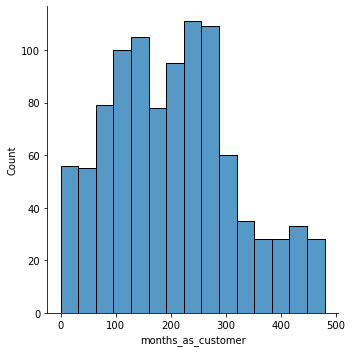

In [9]:
print(dt['months_as_customer'].value_counts())
sns.displot(x='months_as_customer', data=dt)

In [14]:
# continious data # continious data 


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


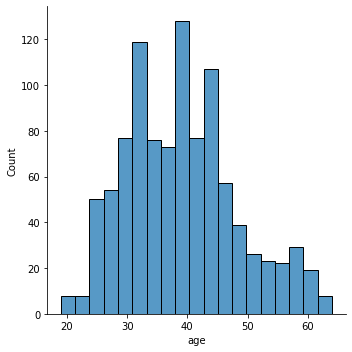

In [15]:
print(dt['age'].value_counts())
sns.displot(x='age', data=dt)

In [16]:
# This is continious data.
#  age range 19 to 63.
#  more insuarance taken range of 25 to 45 ages oeople.
#  ages 19 to 25 & 45 to 63 insurance take low

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


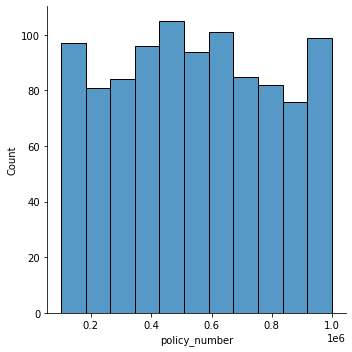

In [17]:
print(dt['policy_number'].value_counts())
sns.displot(x='policy_number', data=dt)

In [18]:
#  This is nominal data, will drop it

01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64


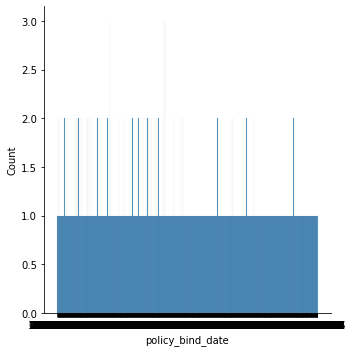

In [19]:
print(dt['policy_bind_date'].value_counts())
sns.displot(x='policy_bind_date', data=dt)

In [20]:
#  this data column . Policy taken date

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


<AxesSubplot:xlabel='policy_state', ylabel='count'>

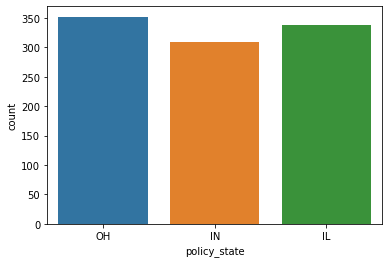

In [21]:
print(dt['policy_state'].value_counts())
sns.countplot(x='policy_state', data=dt)

In [22]:
#  Total 3 state from where people taken insurance.
#  Insurance taken more OHIO-352 then Illinois-338 & INDIAN-310
#  As per graph very awared people is Ohio people about insurance Then Illinois people. Indian people are not warre about Insurance.


250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


<AxesSubplot:xlabel='policy_csl', ylabel='count'>

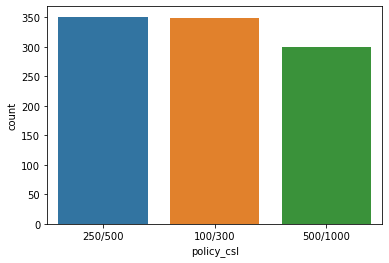

In [23]:
print(dt['policy_csl'].value_counts())
sns.countplot(x='policy_csl', data=dt)

In [24]:
# Three type policy is there.
# 250/500- for badily injury per person will get 2.5 l And max 5L that will get 351 person.
# 100/300-for badily injury per person will get 1l And max 3L that will get 349 person.
# 500/1000-5or badily injury per person will get 1l And max 10L that will get 300 person.
#  250/500 & 100/300 policy taken same number of people.
#  500/1000 policy taten low as comperision with others.

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

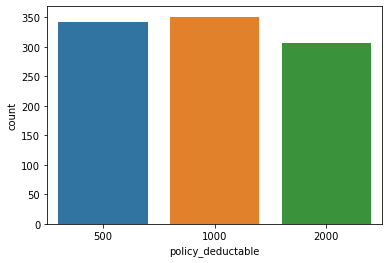

In [25]:
print(dt['policy_deductable'].value_counts())
sns.countplot(x='policy_deductable', data=dt)

In [26]:
# Insurance pay Rs-1000 number of people is 351
# Insurance pay Rs-500 number of people is 342
# Insurance pay Rs-2000 number of people is 307
# Rs.1000 deducted more people for insurance & Rs 2000 deducted lowest people

1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1085.03    1
1437.33    1
988.29     1
1238.89    1
766.19     1
Name: policy_annual_premium, Length: 991, dtype: int64


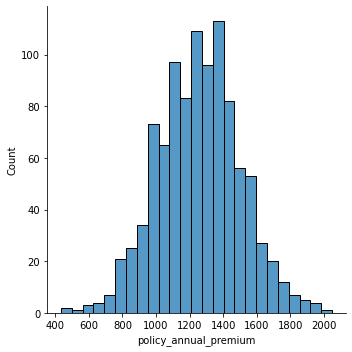

In [27]:
print(dt['policy_annual_premium'].value_counts())
sns.displot(x='policy_annual_premium', data=dt)

In [28]:
#  More people able to pay thier premium range Rs 1000 to Rs 1600. Rs.1600 to 2000 paid very few people.
#  Rs-400 to 900 premium paid few people due coverage is low.

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64


<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

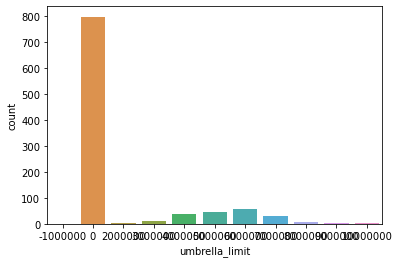

In [29]:
print(dt['umbrella_limit'].value_counts())
sns.countplot(x='umbrella_limit', data=dt)

In [30]:
# Umbrella limit policy taken very few people & maximum people not taken it.

477695    2
469429    2
446895    2
431202    2
456602    2
         ..
476303    1
450339    1
476502    1
600561    1
612260    1
Name: insured_zip, Length: 995, dtype: int64


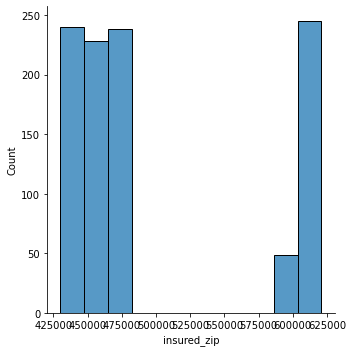

In [31]:
print(dt[ 'insured_zip'].value_counts())
sns.displot(x='insured_zip', data=dt)

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


<AxesSubplot:xlabel='insured_sex', ylabel='count'>

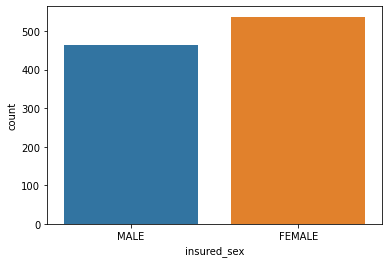

In [32]:
print(dt['insured_sex'].value_counts())
sns.countplot(x='insured_sex', data=dt)

In [33]:
# Catagorical data. Male * Female
#  Female taken poliy more than male.

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

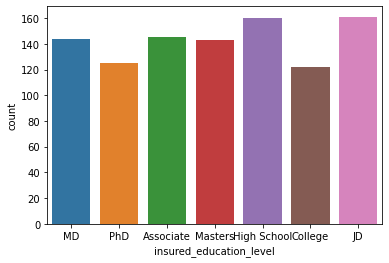

In [34]:
print(dt['insured_education_level'].value_counts())
sns.countplot(x='insured_education_level', data=dt)

In [35]:
# Catagorical Data


machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

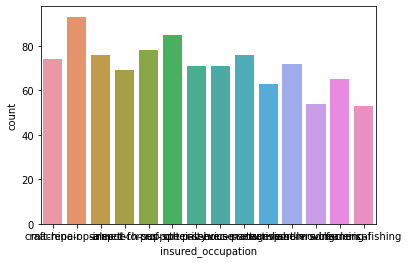

In [36]:
print(dt['insured_occupation'].value_counts())
sns.countplot(x='insured_occupation', data=dt)

In [37]:
# Catagorical Data

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

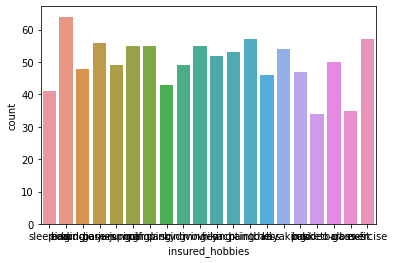

In [38]:
print(dt['insured_hobbies'].value_counts())
sns.countplot(x='insured_hobbies', data=dt)

In [39]:
# Catagorical Data

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

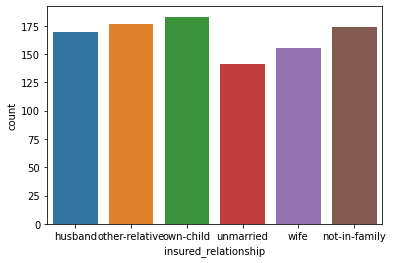

In [40]:
print(dt['insured_relationship'].value_counts())
sns.countplot(x='insured_relationship', data=dt)

In [41]:
# Catagorical Data
#  Relasionship made more with thier child 

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64


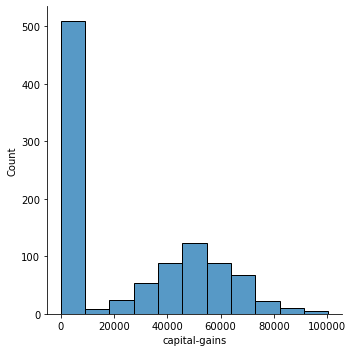

In [42]:
print(dt['capital-gains'].value_counts())
sns.displot(x='capital-gains', data=dt)

In [43]:
# Continious data
# More range 35000 to 70000 of Capital gain

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64


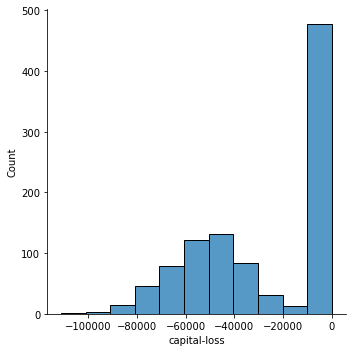

In [44]:
print(dt['capital-loss'].value_counts())
sns.displot(x='capital-loss', data=dt)

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
04-02-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
12-02-2015    20
22-02-2015    20
31-01-2015    20
06-02-2015    20
21-02-2015    19
01-01-2015    19
23-02-2015    19
12-01-2015    19
14-01-2015    19
21-01-2015    19
03-01-2015    18
14-02-2015    18
01-02-2015    18
28-02-2015    18
20-01-2015    18
18-01-2015    18
25-02-2015    18
06-01-2015    17
09-01-2015    17
08-02-2015    17
24-02-2015    17
26-02-2015    17
13-02-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
16-01-2015    16
17-01-2015    15
18-02-2015    15
28-01-2015    15
15-01-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
23-01-2015    13
03-02-2015    13
27-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
29-01-2015    11
02-01-2015    11
19-02-2015    10
11-02-2015    10
10-02-2015    10
07-02-2015    10
25-01-2015    10
11-01-2015    

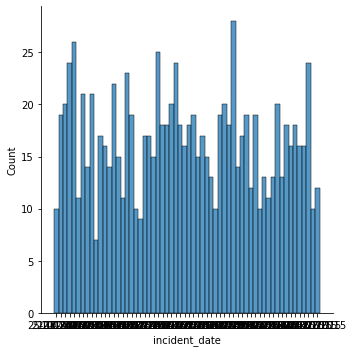

In [45]:
print(dt['incident_date'].value_counts())
sns.displot(x='incident_date', data=dt)

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


<AxesSubplot:xlabel='incident_type', ylabel='count'>

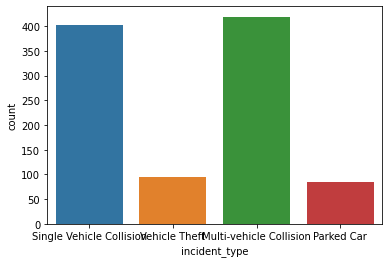

In [46]:
print(dt['incident_type'].value_counts())
sns.countplot(x='incident_type', data=dt)

In [47]:
# catagorical Data. 4 type of car insurance
#  Multi & Single vehicals insurace is more almost equal

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


<AxesSubplot:xlabel='collision_type', ylabel='count'>

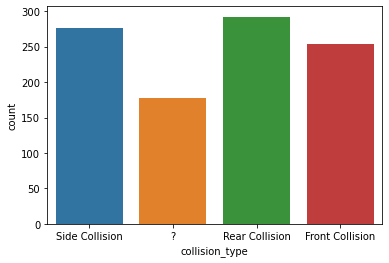

In [48]:
print(dt['collision_type'].value_counts())
sns.countplot(x='collision_type', data=dt)

In [49]:
# Catagorical Data
# ? mark is present

In [50]:
# Handel ? marks 

In [10]:
dt.loc[dt['collision_type']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
13,121,34,626808,26-10-2012,OH,100/300,1000,936.61,0,464652,...,1,NO,7280,1120,1120,5040,Toyota,Highlander,2010,N
26,257,43,863236,20-09-1990,IN,100/300,2000,1322.10,0,436984,...,3,YES,9020,1640,820,6560,Toyota,Camry,2005,N
27,202,34,608513,18-07-2002,IN,100/300,500,848.07,3000000,607730,...,1,?,5720,1040,520,4160,Suburu,Forrestor,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,163,37,390256,25-11-2009,IN,500/1000,1000,1200.33,4000000,477631,...,1,YES,3900,390,780,2730,Volkswagen,Jetta,2008,Y
969,398,55,844062,25-05-1990,OH,250/500,500,862.19,0,606858,...,3,?,6600,600,1200,4800,Accura,MDX,2012,N
983,17,39,774895,28-10-2006,IL,250/500,1000,840.95,0,431202,...,1,?,3440,430,430,2580,Suburu,Legacy,2002,N
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N


In [11]:
dt['collision_type']=dt['collision_type'].replace('?',np.NaN) # replace NaN value in ? marks

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


<AxesSubplot:xlabel='collision_type', ylabel='count'>

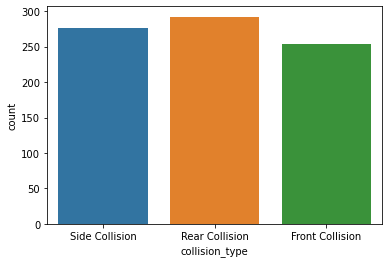

In [53]:
# Cheking NaN value repaced or not
print(dt['collision_type'].value_counts())
sns.countplot(x='collision_type', data=dt)

In [54]:
# Now only 3 type show

In [55]:
dt['collision_type'].isna().sum()

178

In [56]:
# Now missing value is 178 nos. So NaN value replaced in ? mark

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


<AxesSubplot:xlabel='incident_severity', ylabel='count'>

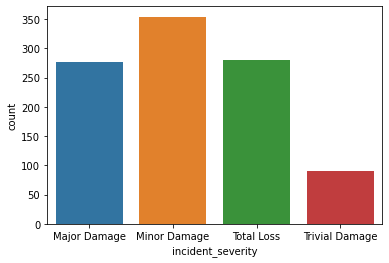

In [57]:
print(dt['incident_severity'].value_counts())
sns.countplot(x='incident_severity', data=dt)

In [58]:
# Catagorical Data
# Minor Damage scale is more

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

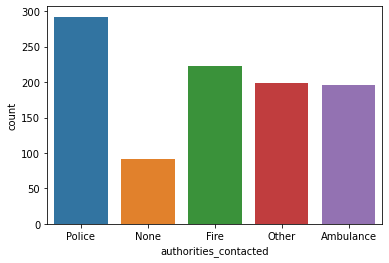

In [59]:
print(dt['authorities_contacted'].value_counts())
sns.countplot(x='authorities_contacted', data=dt)

In [60]:
# Catagorical data
# 

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


<AxesSubplot:xlabel='incident_state', ylabel='count'>

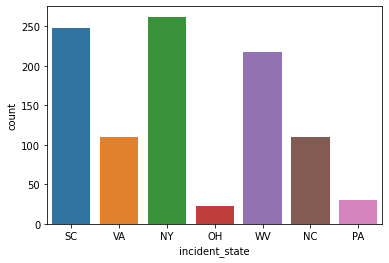

In [61]:
print(dt['incident_state'].value_counts())
sns.countplot(x='incident_state', data=dt)

In [62]:
# Catagorical data
# 7 incident state is present.
#  highest policy is in NY state. Then SC,WW. these 3 states are taken more than 200 

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


<AxesSubplot:xlabel='incident_city', ylabel='count'>

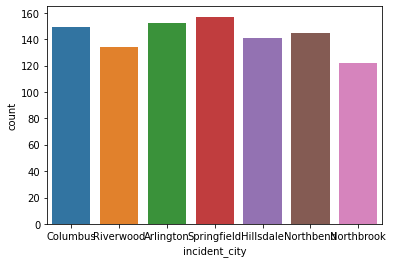

In [63]:
print(dt['incident_city'].value_counts())
sns.countplot(x='incident_city', data=dt)

In [64]:
# Catagorical Data

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64


<AxesSubplot:xlabel='incident_location', ylabel='count'>

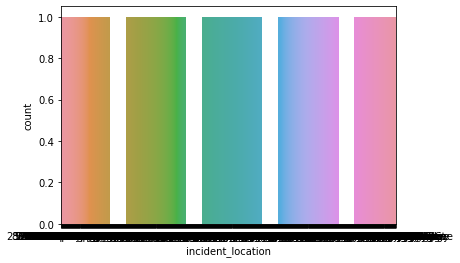

In [65]:
print(dt['incident_location'].value_counts())
sns.countplot(x='incident_location', data=dt)

17    54
3     53
0     52
23    51
16    49
13    46
10    46
4     46
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64


<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

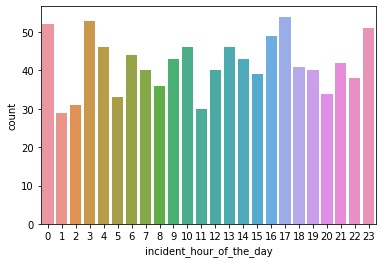

In [66]:
print(dt['incident_hour_of_the_day'].value_counts())
sns.countplot(x='incident_hour_of_the_day', data=dt)

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


<AxesSubplot:xlabel='property_damage', ylabel='count'>

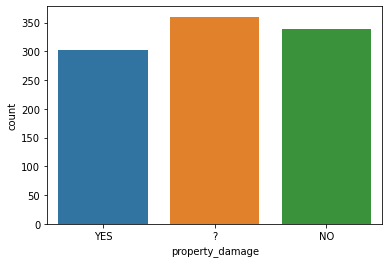

In [67]:
print(dt['number_of_vehicles_involved'].value_counts())
sns.countplot(x='property_damage', data=dt)

In [68]:
# One type of vehicales involved 581 Nos
#  Three type of Vehicals involed 358 nos

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


<AxesSubplot:xlabel='property_damage', ylabel='count'>

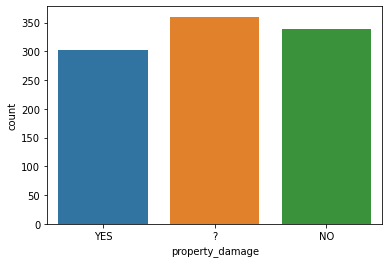

In [69]:
print(dt['property_damage'].value_counts())
sns.countplot(x='property_damage', data=dt)

In [70]:
# Catagorical Data
#  ? mark is present.. We will treat it

In [12]:
dt.loc[dt['property_damage']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,2,YES,51590,9380,9380,32830,Audi,A5,2015,N
16,70,26,558938,08-06-2005,OH,500/1000,1000,1199.44,5000000,619884,...,2,YES,52110,5790,5790,40530,Nissan,Maxima,2012,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
994,141,30,681486,24-03-2007,IN,500/1000,1000,1347.04,0,430665,...,2,YES,6480,540,1080,4860,Honda,Civic,1996,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [13]:
dt['property_damage']=dt['property_damage'].replace('?',np.NaN) # replace with NaN value

NO     338
YES    302
Name: property_damage, dtype: int64


<AxesSubplot:xlabel='property_damage', ylabel='count'>

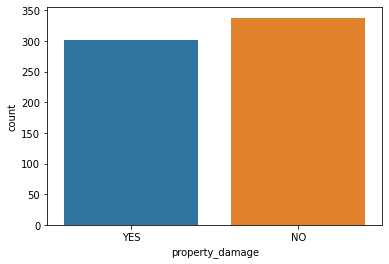

In [73]:
print(dt['property_damage'].value_counts())
sns.countplot(x='property_damage', data=dt)

In [74]:
# Now 2 Catagory value is showing.

In [75]:
dt['property_damage'].isna().sum()

360

In [76]:
# Now NaN value is 360 Nos

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

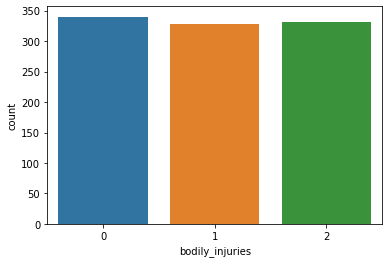

In [77]:
print(dt['bodily_injuries'].value_counts())
sns.countplot(x='bodily_injuries', data=dt)

In [78]:
# Badily injures devided 3 catagory.
# All are almost equal with each other.

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


<AxesSubplot:xlabel='witnesses', ylabel='count'>

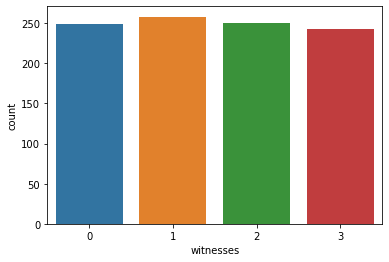

In [79]:
print(dt['witnesses'].value_counts())
sns.countplot(x='witnesses', data=dt)

In [80]:
# 4 catagory
#  1 witness is more in policy
# 2 no of witness is 250 in policy
#  0 & 3 no of witness is almost same.

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

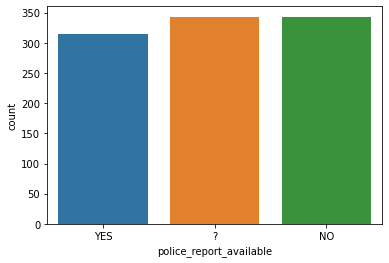

In [81]:
print(dt['police_report_available'].value_counts())
sns.countplot(x='police_report_available', data=dt)

In [82]:
# Catagorycal data
# ? markes is paresent 343 nos. we will treat it

In [14]:
dt.loc[dt['police_report_available']=='?']

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,0,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,1,?,42300,4700,4700,32900,Saab,92x,1996,N
10,235,42,543610,26-05-2002,OH,100/300,500,1253.12,4000000,462283,...,2,?,87010,7910,15820,63280,Ford,F150,2002,N
20,460,62,183430,25-06-2002,IN,250/500,1000,1187.96,4000000,618845,...,0,?,47160,0,5240,41920,Suburu,Impreza,2011,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,22,21,550127,04-07-2007,IN,250/500,1000,1248.05,0,443550,...,2,?,53280,5920,0,47360,Chevrolet,Malibu,2015,N
993,124,28,674570,08-12-2001,OH,250/500,1000,1235.14,0,443567,...,1,?,60200,6020,6020,48160,Volkswagen,Passat,2012,N
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N


In [15]:
dt['police_report_available']=dt['police_report_available'].replace('?',np.NaN) # replace NaN value in ? mark

NO     343
YES    314
Name: police_report_available, dtype: int64


<AxesSubplot:xlabel='police_report_available', ylabel='count'>

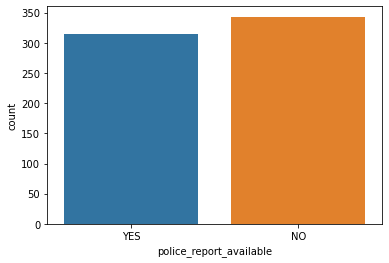

In [85]:
print(dt['police_report_available'].value_counts())
sns.countplot(x='police_report_available', data=dt)

In [86]:
# Now 2 type policy report

59400    5
2640     4
70400    4
4320     4
44200    4
        ..
65250    1
87100    1
6240     1
66600    1
67500    1
Name: total_claim_amount, Length: 763, dtype: int64


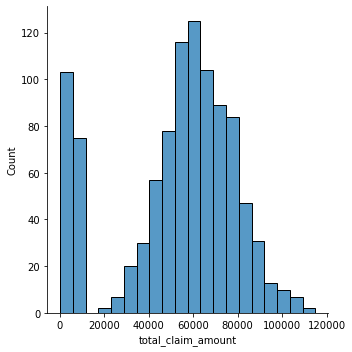

In [87]:
print(dt['total_claim_amount'].value_counts())
sns.displot(x='total_claim_amount', data=dt)

In [88]:
# Continious data
#  max claim range between 40000 to 90000 Rs

0        25
640       7
480       7
660       5
580       5
         ..
14840     1
6580      1
11820     1
16650     1
7500      1
Name: injury_claim, Length: 638, dtype: int64


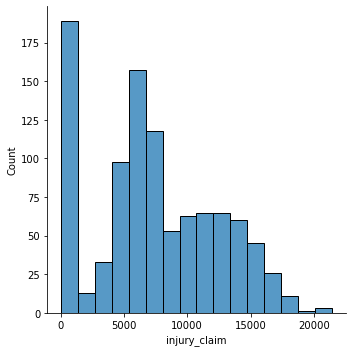

In [89]:
print(dt['injury_claim'].value_counts())
sns.displot(x='injury_claim', data=dt)

In [90]:
# Continious data
# On an average 80 nos people are claim from 4000 to 16000

0        19
860       6
480       5
660       5
10000     5
         ..
3590      1
6480      1
4580      1
4920      1
7500      1
Name: property_claim, Length: 626, dtype: int64


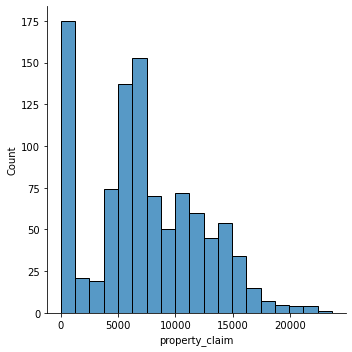

In [91]:
print(dt['property_claim'].value_counts())
sns.displot(x='property_claim', data=dt)

In [92]:
#  Continious data
#  on an average 150 Nos people made claim for 4000 to 8000.
# on an average 70 nos people made claim 9000 to 16000

5040     7
3360     6
52080    5
4720     5
3600     5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 726, dtype: int64


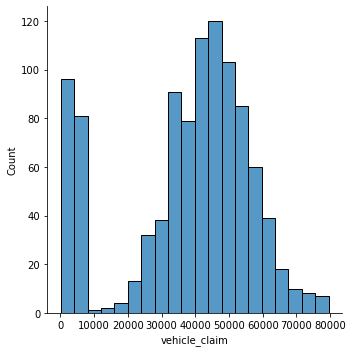

In [93]:
print(dt['vehicle_claim'].value_counts())
sns.displot(x='vehicle_claim', data=dt)

In [94]:
#  Continious data
# On an avearge 100 nos people made vehical claim from 30000 to 65000

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


<AxesSubplot:xlabel='auto_make', ylabel='count'>

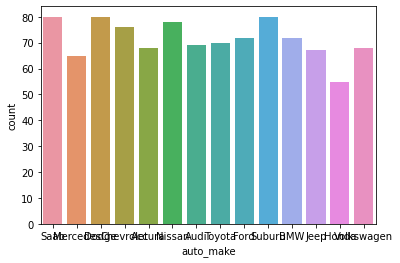

In [95]:
print(dt['auto_make'].value_counts())
sns.countplot(x='auto_make', data=dt)

In [96]:
# Catagorical Data

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


<AxesSubplot:xlabel='auto_model', ylabel='count'>

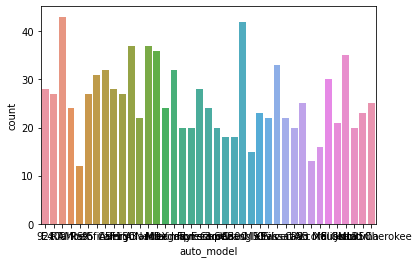

In [97]:
print(dt['auto_model'].value_counts())
sns.countplot(x='auto_model', data=dt)

In [98]:
# Catagorical Data. Different type of car model for insurance

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


<AxesSubplot:xlabel='auto_year', ylabel='count'>

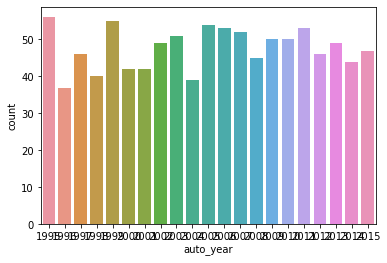

In [99]:
print(dt['auto_year'].value_counts())
sns.countplot(x='auto_year', data=dt)


N    753
Y    247
Name: fraud_reported, dtype: int64


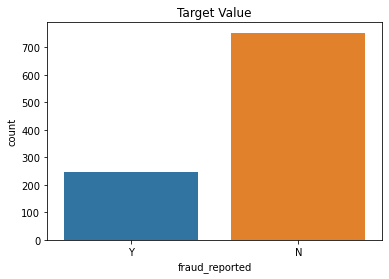

In [100]:
print(dt['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported', data=dt)
plt.title('Target Value')
plt.show()

In [101]:
#  Catagorical data Two type. it is binary data
#  correct report is 753 Nos
#  Fraud report is 247 nos

In [102]:
# Checking Nan Value in data set

In [103]:
dt.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [104]:
#  NaN value present in collision_type-178 Nos,property_damage - 360 Nos, police_report_available - 343 Nos

In [16]:
# Drop Policy number column bcz it is nominal data
dt.drop(['policy_number'],axis=1,inplace=True)

In [17]:
# Delete duplicate value if any
dt.drop_duplicates(inplace=True)

In [18]:
dt.shape

(1000, 38)

In [19]:
# No Duplicate value is present here.

In [20]:
# we drop the NaN value columns due to near about 40% data missing
dt.drop(['collision_type', 'property_damage','police_report_available'],axis=1,inplace=True)

In [21]:
dt.shape

(1000, 35)

In [22]:
# Now  Total rows=1000 & Columns=35

In [23]:
#  Drop the date column
dt.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [24]:
dt.shape

(1000, 33)

In [25]:
# Now column=33 & Rows- 1000

In [26]:
# using orinal encoder encoder for converting object to number.
from sklearn.preprocessing import OrdinalEncoder
en=OrdinalEncoder()

In [27]:
for i in dt.columns:
    if dt[i].dtypes=='object':
        dt[i]=en.fit_transform(dt[i].values.reshape(-1,1))
        

In [28]:
dt.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2.0,1.0,1000,1406.91,0,466132,1.0,4.0,...,1,2,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,1.0,4.0,...,0,0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,0.0,6.0,...,2,3,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,0.0,6.0,...,1,2,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,1.0,0.0,...,0,1,6500,1300,650,4550,0.0,31.0,2009,0.0


In [29]:
# Now encoded all columns where object value is present

In [30]:
#  show basic information of data

In [31]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   float64
 3   policy_csl                   1000 non-null   float64
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   float64
 9   insured_education_level      1000 non-null   float64
 10  insured_occupation           1000 non-null   float64
 11  insured_hobbies              1000 non-null   float64
 12  insured_relationship         1000 non-null   float64
 13  capital-gains      

In [128]:
# Now all Columns are in int & Float value.

In [129]:
# data describe for observation only for continious data
dt.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,0.463000,2.966000,...,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,0.498879,1.948497,...,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,1.000000,...,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,3.000000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,1.000000,5.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,1.000000,6.000000,...,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [ ]:
# Observation
# 

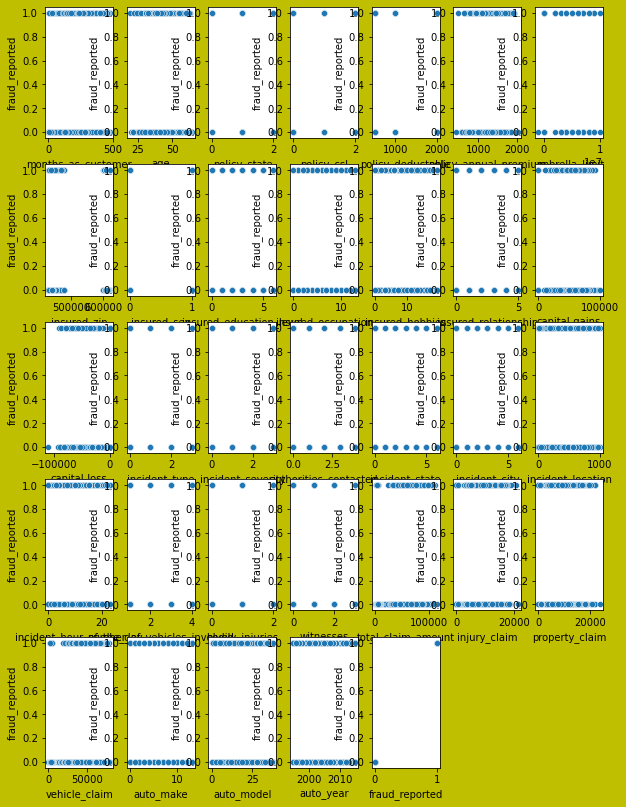

In [130]:
# Cheking normal distribution of data in continious data

plt.figure(figsize=(10,14),facecolor='y')
plotnumber=1
for i in dt:
    
    if plotnumber<=34:
        ax=plt.subplot(5,7,plotnumber)
        sns.scatterplot(dt[i],dt['fraud_reported'])
                   
        plt.xlabel(i)
                          
    plotnumber+=1

plt.show()

In [131]:
dt.corr().abs()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.000328,0.026819,0.026807,0.005018,0.015498,0.017895,0.060925,0.000833,...,0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.000292,0.020544
age,0.922098,1.000000,0.014533,0.015185,0.029188,0.014404,0.018126,0.025604,0.073337,0.000969,...,0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.001354,0.012143
policy_state,0.000328,0.014533,1.000000,0.001027,0.010033,0.012455,0.029580,0.008777,0.020481,0.034327,...,0.013384,0.022960,0.006002,0.046290,0.008406,0.001425,0.017124,0.025253,0.002114,0.029432
policy_csl,0.026819,0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,0.006879,0.010757,0.009153,...,0.000595,0.071500,0.055758,0.078818,0.042216,0.046791,0.004701,0.047885,0.033082,0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,0.003245,0.010870,0.004545,0.009733,0.015217,...,0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.035379,0.003268,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,0.003245,1.000000,0.006247,0.032354,0.038853,0.019715,...,0.026780,0.002332,0.009094,0.017633,0.011654,0.020246,0.000045,0.031849,0.049226,0.014480
umbrella_limit,0.015498,0.018126,0.029580,0.021636,0.010870,0.006247,1.000000,0.019671,0.010688,0.019357,...,0.022743,0.006738,0.040344,0.045412,0.023790,0.038584,0.004443,0.040256,0.009893,0.058622
insured_zip,0.017895,0.025604,0.008777,0.006879,0.004545,0.032354,0.019671,1.000000,0.036942,0.016079,...,0.028695,0.019805,0.033873,0.017495,0.006841,0.041083,0.020892,0.023637,0.032736,0.019368
insured_sex,0.060925,0.073337,0.020481,0.010757,0.009733,0.038853,0.010688,0.036942,1.000000,0.009002,...,0.020297,0.042463,0.023727,0.000924,0.014868,0.029609,0.026457,0.018421,0.028247,0.030873
insured_education_level,0.000833,0.000969,0.034327,0.009153,0.015217,0.019715,0.019357,0.016079,0.009002,1.000000,...,0.012072,0.019211,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.043509,0.008808


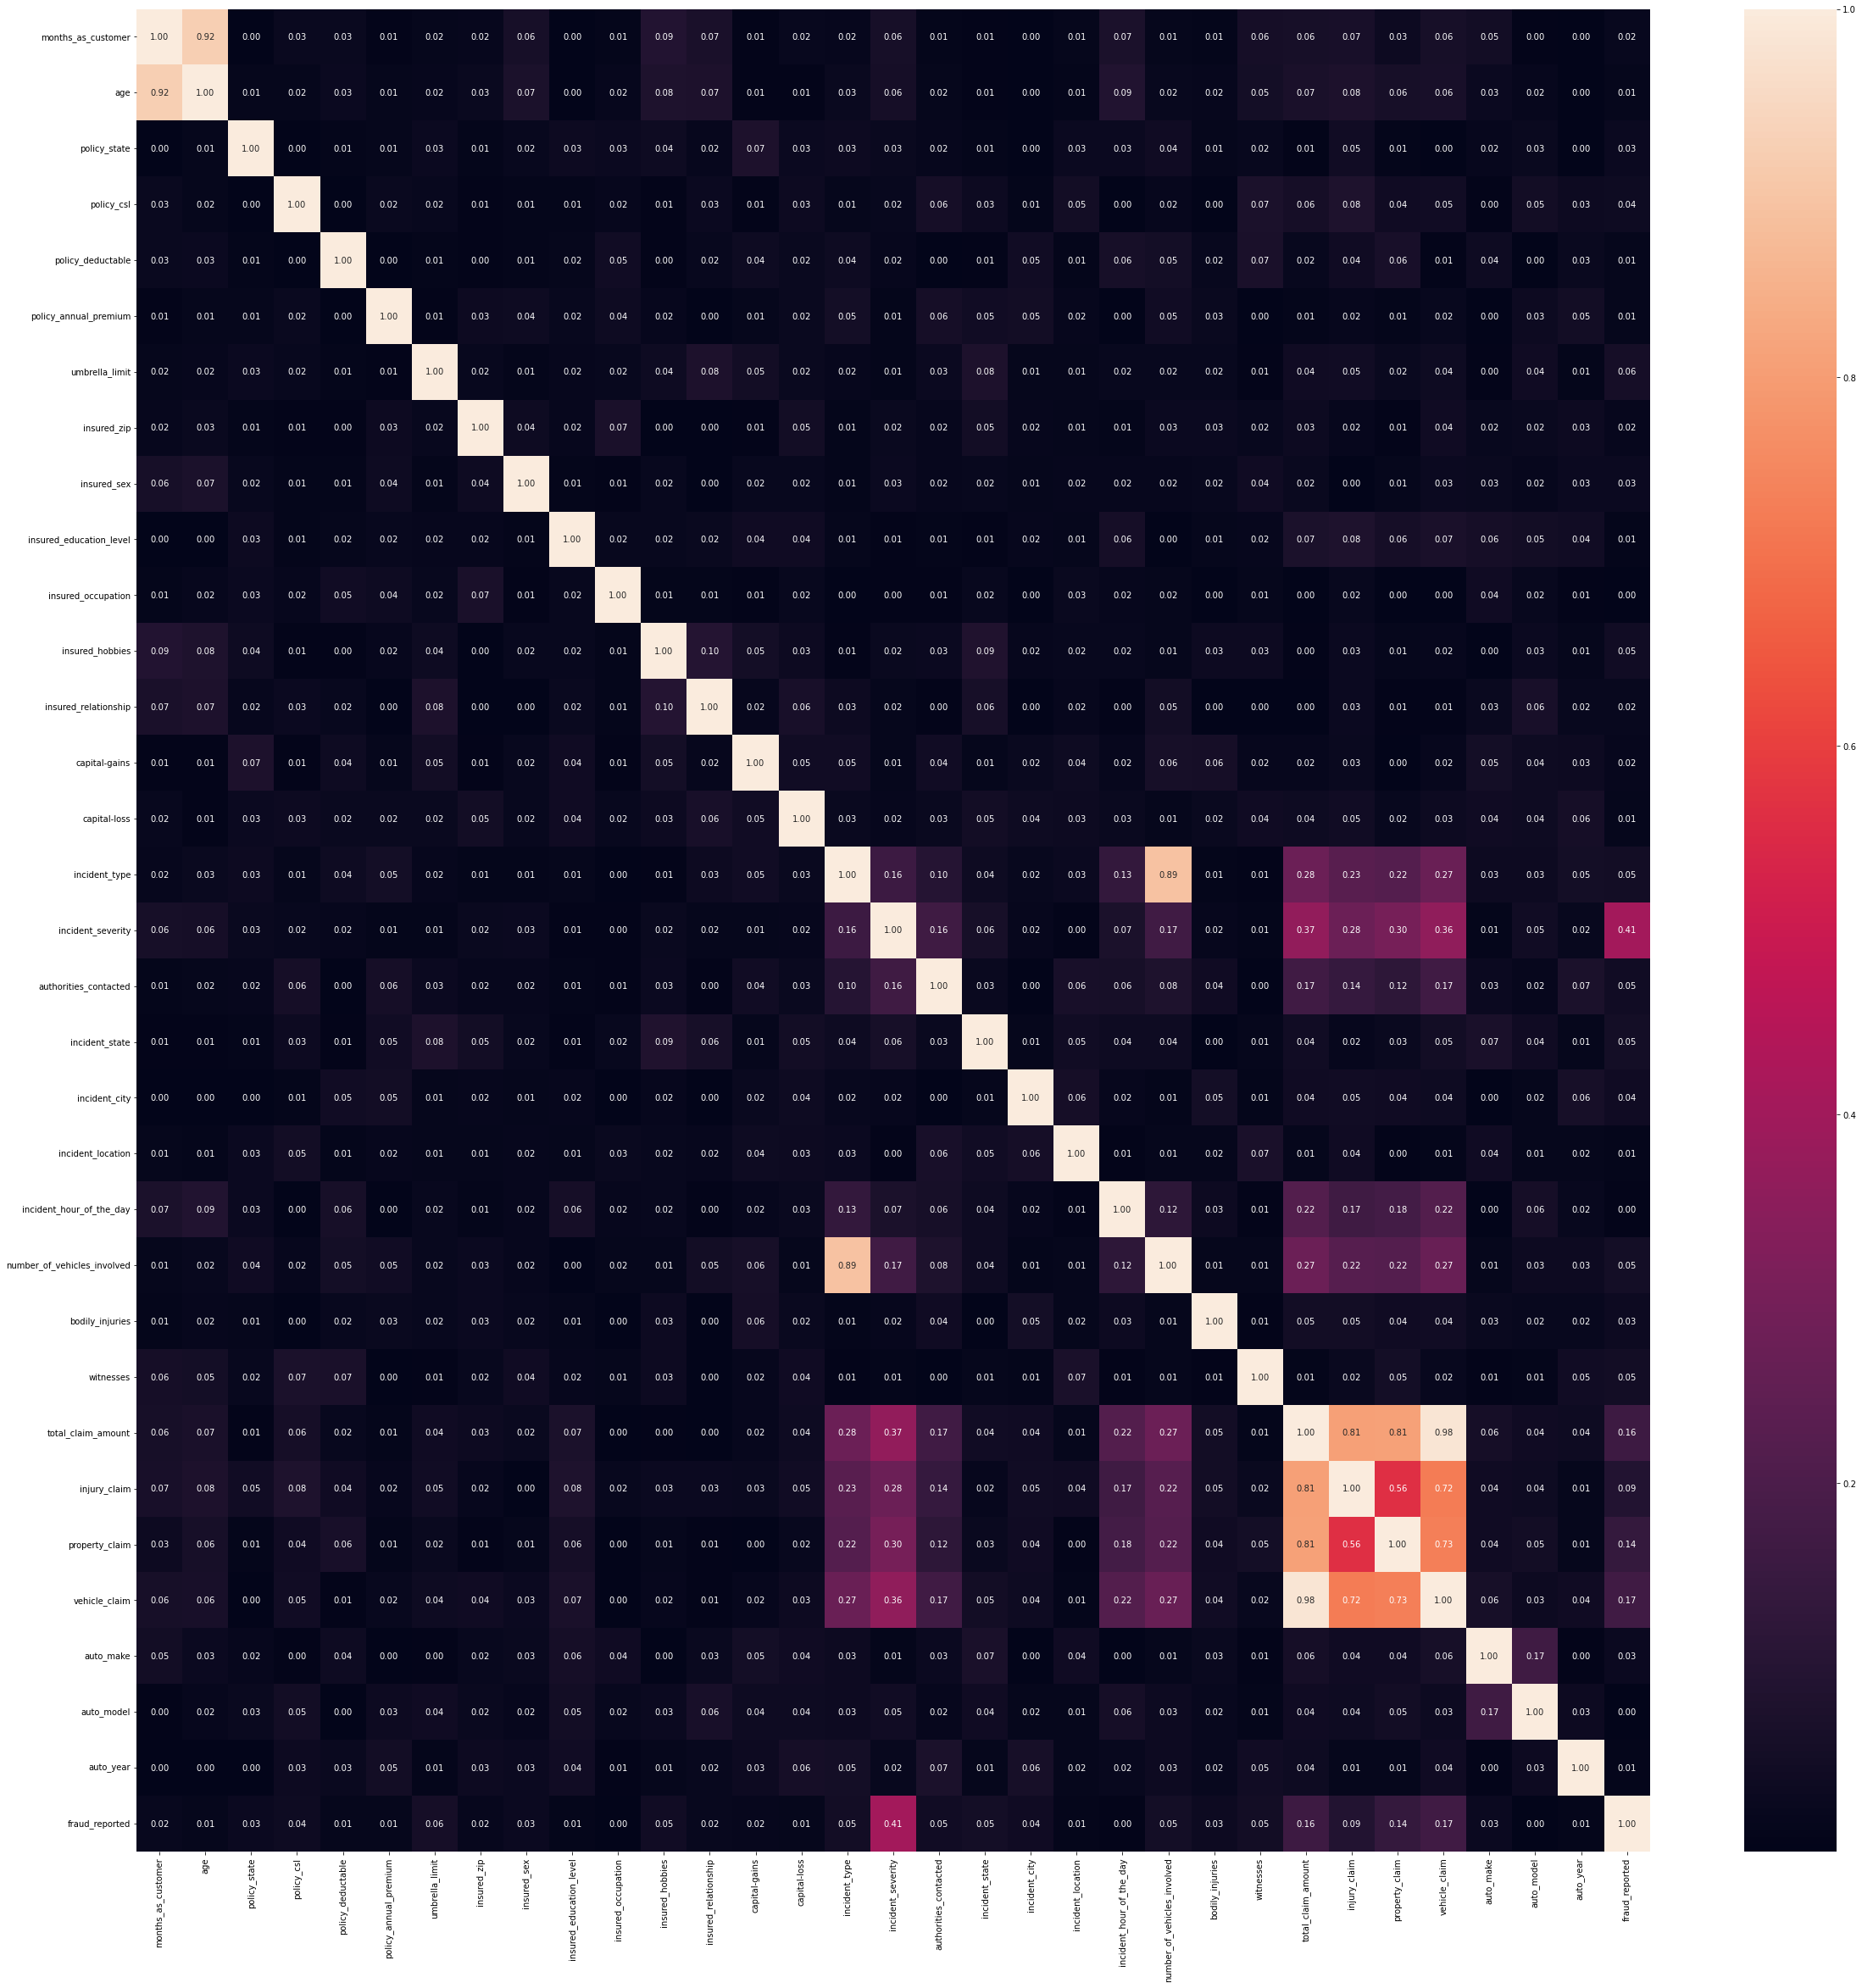

In [132]:
plt.figure(figsize=(40,40))
ax=sns.heatmap(dt.corr().abs(),annot=True,fmt='0.2f')
plt.savefig('Insurance Fraud Detection.jpg')

plt.show()

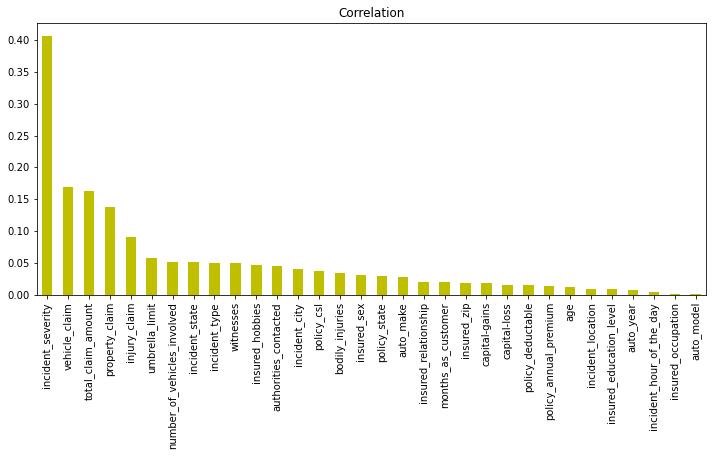

In [133]:
plt.figure(figsize=(12,5))
dt.corr().abs()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.title('Correlation')
plt.show()

In [134]:
#  very low relation is Auto Model, & Insured ocupation

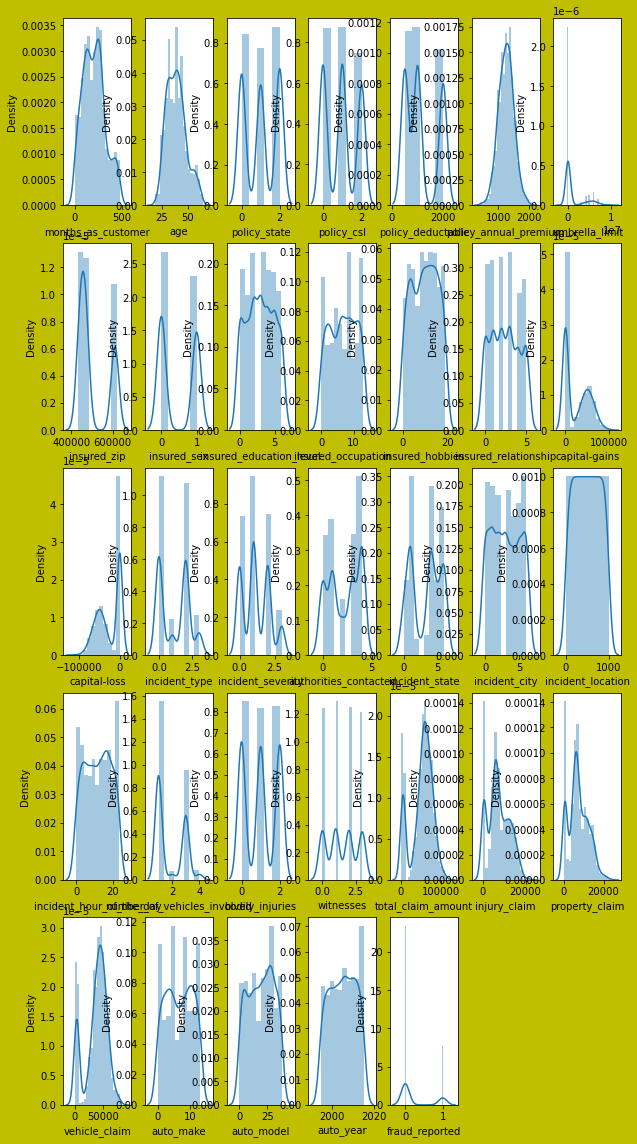

In [138]:
# Cheking normal distribution of data in continious data

plt.figure(figsize=(10,20),facecolor='y')
plotnumber=1
for i in dt:
    
    if plotnumber<=34:
        ax=plt.subplot(5,7,plotnumber)
        sns.distplot(dt[i])
                   
        plt.xlabel(i)
                          
    plotnumber+=1

plt.show()

In [139]:
# Data normaly distributed

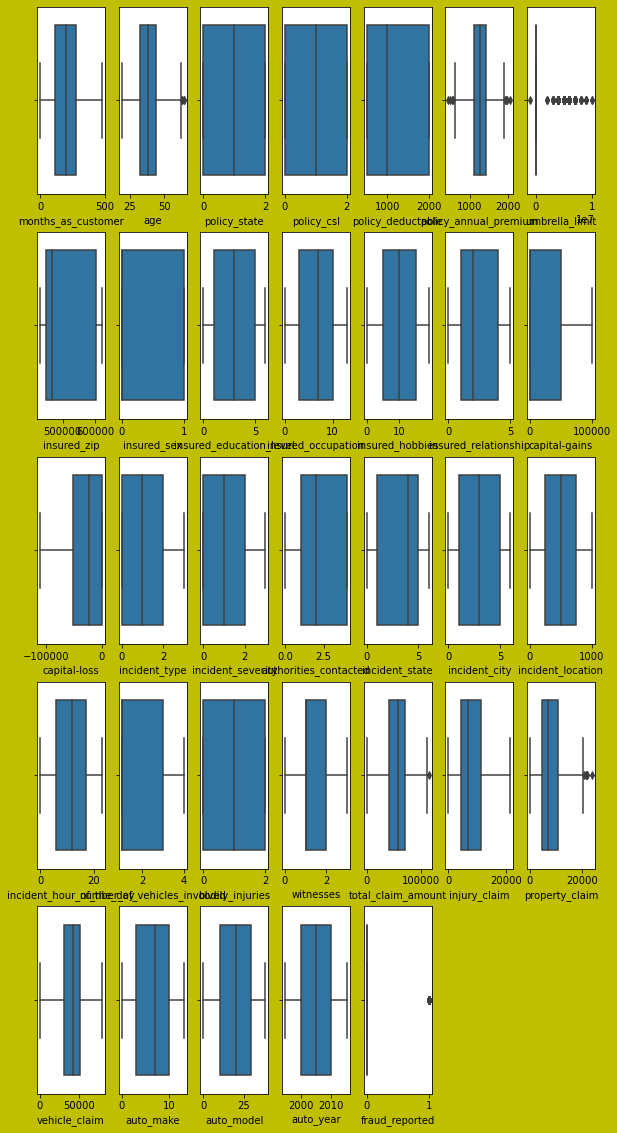

In [140]:
# Cheking Outlier of data in continious data

plt.figure(figsize=(10,20),facecolor='y')
plotnumber=1
for i in dt:
    
    if plotnumber<=34:
        ax=plt.subplot(5,7,plotnumber)
        sns.boxplot(dt[i])
                   
        plt.xlabel(i)
                          
    plotnumber+=1

plt.show()

In [141]:
# Outlier present as following Column
# 1. Age- uper Outlier present
# 2. Policy annual premium- Down & Uper outlier present
# 3. Umbrella Limit- Uper oulier present
# 4. Total Claim Amount- Uper outlier present
# 5. Property Claim- Uper outlier present


In [32]:
# Handel Outlier using Zscore method
# Handeling the outlier usie Z score
from scipy.stats import zscore
z_socore=zscore(dt[['policy_annual_premium','umbrella_limit','total_claim_amount','property_claim']])
z_score_abs=np.abs(z_socore)
filter=(z_score_abs<3).all(axis=1)
dt=dt[filter]

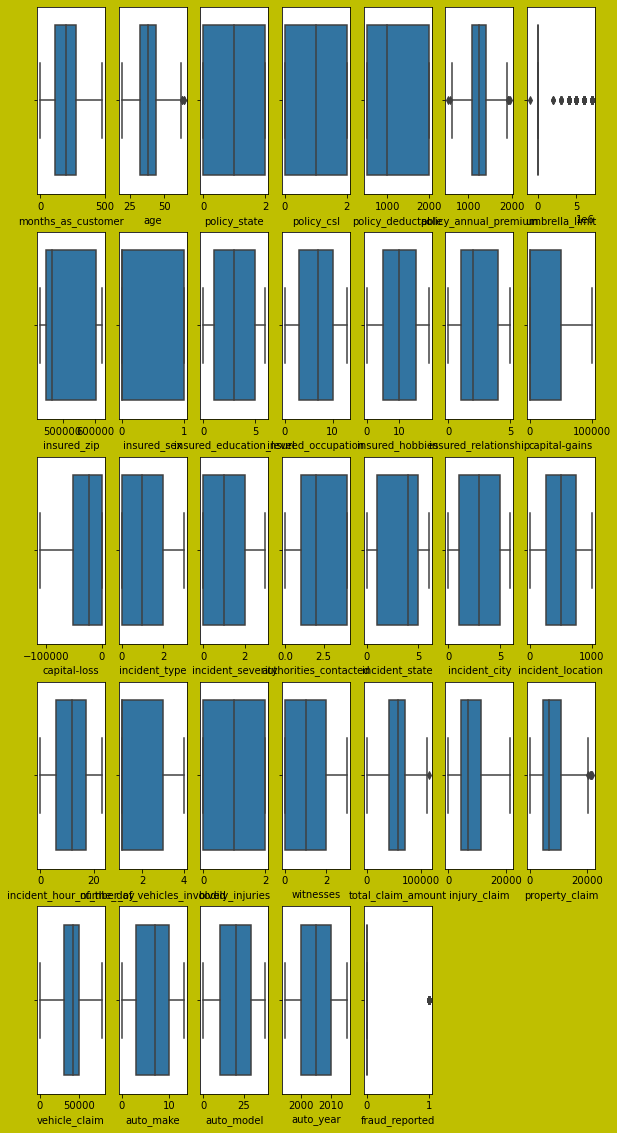

In [143]:
# Cheking Outlier of data in continious data

plt.figure(figsize=(10,20),facecolor='y')
plotnumber=1
for i in dt:
    
    if plotnumber<=34:
        ax=plt.subplot(5,7,plotnumber)
        sns.boxplot(dt[i])
                   
        plt.xlabel(i)
                          
    plotnumber+=1

plt.show()

In [144]:
# Minimize the outlier. only taken 3std data.

In [33]:
# Separate Indipendent value & target vale
x=dt.drop(['fraud_reported'],axis=1)
y=dt.fraud_reported

In [34]:
# CHeking corelation in between feature


In [35]:
# Relationship checking in feature- one featur to othere feature
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
x.shape[1]

32

In [37]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif['Feature']=x.columns
vif

,vif,Feature
0,28.575089,months_as_customer
1,131.434839,age
2,2.570291,policy_state
3,2.449661,policy_csl
4,4.624155,policy_deductable
5,28.880689,policy_annual_premium
6,1.255295,umbrella_limit
7,51.574783,insured_zip
8,1.912385,insured_sex
9,3.406090,insured_education_level


In [150]:
# Threshold 5. If corelation is more than 5 , we will drop that feature.
# More than 5 corealtion is as follow
# 28.57-months_as_customer
# 131.43	age
# 28.88	  'policy_annual_premium'
# 51.57	 insured_zip
# 11.24	 incident_type
# 21.83	 number_of_vehicles_involved
# 205.45	auto_year

In [38]:
x.drop(['months_as_customer','age','policy_annual_premium','insured_zip','incident_type','number_of_vehicles_involved','auto_year'],axis=1,inplace=True)

In [39]:
x.drop(['incident_hour_of_the_day','auto_model','insured_occupation'],axis=1,inplace=True)

In [40]:
# We dropd these feature bcz there relation ship with Target value is very low

In [41]:
# Checking Skewness of all feature
x.skew()

policy_state              -0.038101
policy_csl                 0.098092
policy_deductable          0.473431
umbrella_limit             1.803065
insured_sex                0.141238
insured_education_level    0.006225
insured_hobbies           -0.060134
insured_relationship       0.076242
capital-gains              0.465985
capital-loss              -0.390468
incident_severity          0.278443
authorities_contacted     -0.112301
incident_state            -0.147048
incident_city              0.042537
incident_location         -0.002655
bodily_injuries            0.001877
witnesses                  0.024567
total_claim_amount        -0.595242
injury_claim               0.269442
property_claim             0.358919
vehicle_claim             -0.622528
auto_make                 -0.027133
dtype: float64

In [156]:
# No need to treat any method to minimize the skewness bcz these skewness result is low than +-0.05.

In [161]:
# Standarized the data using stander scaler

In [42]:
from sklearn.preprocessing import StandardScaler
Stnd=StandardScaler()
x_sclr=Stnd.fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.model_selection import cross_val_score

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_sclr,y,random_state=88,test_size=0.25)

In [45]:
def matric_score(lr,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=lr.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=lr.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
        print('=======Confusion Matrix============')
        print(confusion_matrix(y_test,pred1))

###  LogisticRegression Model

In [127]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [176]:
matric_score(lr,x_train,x_test,y_train,y_test,train=True)
matric_score(lr,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 80.95%

==========Test Result==========

Accuracy Score : 77.64%
classification report 
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       184
         1.0       0.62      0.29      0.40        62

    accuracy                           0.78       246
   macro avg       0.71      0.62      0.63       246
weighted avg       0.75      0.78      0.75       246

=======Confusion Matrix============
[[173  11]
 [ 44  18]]


In [177]:
# Training Accuracy score is 81% & Test accuracy score is 78%. Thus its accuracy score is good.
# Agerage of Presision, recall & f1 score is good.
#  In confusion matrix- 1 type error is only 11 & 2 type error is 44. Model says that 11 no policy is not fraud but it actualy fraud.
#  2 type error- model says that 44 no policy fraud but actualy not froad. 

In [178]:
# Cheking Cross val Score for madel overfitting or not
round(cross_val_score(lr,x_sclr,y,cv=9).mean()*100)

79

In [179]:
# Cross val score is 79% And accuracy score is 78%. Both are in same line so it is not overfitting model

In [180]:
# we want to imporove result by using hyperparameter tune
param={'max_iter': [10,11,12,13,14,15,18,17,19,20],
      'n_jobs':[2,3,5,9,10]}

In [52]:
from sklearn.model_selection import GridSearchCV

In [182]:

grid=GridSearchCV(lr,param_grid=param)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'max_iter': [10, 11, 12, 13, 14, 15, 18, 17, 19, 20],
                         'n_jobs': [2, 3, 5, 9, 10]})

In [183]:
grid.best_params_

{'max_iter': 10, 'n_jobs': 2}

In [184]:
lr=LogisticRegression(max_iter= 10, n_jobs= 2)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10, n_jobs=2)

In [185]:
matric_score(lr,x_train,x_test,y_train,y_test,train=True)
matric_score(lr,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 80.95%

==========Test Result==========

Accuracy Score : 77.64%
classification report 
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       184
         1.0       0.62      0.29      0.40        62

    accuracy                           0.78       246
   macro avg       0.71      0.62      0.63       246
weighted avg       0.75      0.78      0.75       246

=======Confusion Matrix============
[[173  11]
 [ 44  18]]


In [186]:
# Accuracy score is not increase

### Knn Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [47]:
def matric_score(cal,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=knn.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=knn.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
        print('=======Confusion Matrix============')
        print(confusion_matrix(y_test,pred1))

In [48]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
matric_score(knn,x_train,x_test,y_train,y_test,train=True)
matric_score(knn,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 80.95%

==========Test Result==========

Accuracy Score : 72.76%
classification report 
               precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       184
         1.0       0.41      0.18      0.25        62

    accuracy                           0.73       246
   macro avg       0.59      0.55      0.54       246
weighted avg       0.68      0.73      0.69       246

=======Confusion Matrix============
[[168  16]
 [ 51  11]]


In [192]:
# Training Accuracy score is 81% & Test accuracy score is 73%. Thus its accuracy score is good.
# Agerage of Presision, recall & f1 score is good.
#  In confusion matrix- 1 type error is only 16 & 2 type error is 51. Model says that 16 no policy is not fraud but it actualy fraud.
#  2 type error- model says that 51 no policy fraud but actualy not froad. 
# in knn error is increase

In [193]:
# Cheking Cross val Score for madel overfitting or not
round(cross_val_score(knn,x_sclr,y,cv=9).mean()*100)

75

In [194]:
# Cross val score is 75% And accuracy score is 73%. Both are in same line so it is not overfitting model

In [50]:
# Use hyperparameter for increase result
pram={'n_neighbors':[2,3,4,5,6,7,8,9,10],
     'algorithm':['kd_tree', 'brute'],
     'leaf_size':range(10,20),
     }

In [53]:
grid=GridSearchCV(knn,param_grid=pram)
grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(10, 20),
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [54]:
grid.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 10}

In [55]:
knn=KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = 10, n_neighbors = 10)

In [56]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=10, n_neighbors=10)

In [57]:
matric_score(knn,x_train,x_test,y_train,y_test,train=True)
matric_score(knn,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 78.37%

==========Test Result==========

Accuracy Score : 74.80%
classification report 
               precision    recall  f1-score   support

         0.0       0.76      0.98      0.85       184
         1.0       0.50      0.06      0.11        62

    accuracy                           0.75       246
   macro avg       0.63      0.52      0.48       246
weighted avg       0.69      0.75      0.67       246

=======Confusion Matrix============
[[180   4]
 [ 58   4]]


In [58]:
# Accuracy score of both train & test is good. 
# on an average of precision, Recall & f1-Score is okay.
#  In confusion matrix- 1 type error is only 4 & 2 type error is 58. Model says that 4 no policy is not fraud but it actualy fraud.
#  2 type error- model says that 58 no. of policy fraud but actualy not froad. 
# It is good 

###   RandomForest Model

In [64]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()

In [69]:
def matric_score(cal,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=ran.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=ran.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
        print('=======Confusion Matrix============')
        print(confusion_matrix(y_test,pred1))

In [70]:
ran.fit(x_train,y_train)

RandomForestClassifier()

In [71]:
matric_score(ran,x_train,x_test,y_train,y_test,train=True)
matric_score(ran,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 100.00%

==========Test Result==========

Accuracy Score : 77.64%
classification report 
               precision    recall  f1-score   support

         0.0       0.80      0.93      0.86       184
         1.0       0.61      0.32      0.42        62

    accuracy                           0.78       246
   macro avg       0.70      0.63      0.64       246
weighted avg       0.75      0.78      0.75       246

=======Confusion Matrix============
[[171  13]
 [ 42  20]]


In [ ]:
# Accuracy score of both train-100 & test-78 is good. 
# on an average of precision, Recall & f1-Score is good ratio.
#  In confusion matrix- 1 type error is only 13 & 2 type error is 42. Model says that 13 no. of policy is not fraud but it actualy fraud.
#  2 type error- model says that 58 no. of policy fraud but actualy not froad. 
# It is good 

In [68]:
# Cheking Cross val Score for madel overfitting or not
round(cross_val_score(ran,x,y,cv=9).mean()*100)

77

In [72]:
#  result is okay. Madel is not overfitting

In [73]:
# Use hyperparameter for increase result
pram={'n_estimators':[2,3,4,5,6,7,8,9,10],
      'criterion':['gini', 'entropy'],
      'max_depth':range(10,20),
      'min_samples_split':range(5,15),
      'min_samples_leaf':range(5,15)}

In [74]:
grid=GridSearchCV(ran,param_grid=pram) # model train with parameter to looking for best perameter
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'min_samples_leaf': range(5, 15),
                         'min_samples_split': range(5, 15),
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [75]:
grid.best_params_ # find best perameter

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 7,
 'min_samples_split': 13,
 'n_estimators': 3}

In [77]:
ran=RandomForestClassifier(criterion = 'entropy',   # Run the model with best paremeter
 max_depth = 10,
 min_samples_leaf = 7,
 min_samples_split = 13,
 n_estimators = 3)

In [78]:
ran.fit(x_train,y_train)  # train the model

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7,
                       min_samples_split=13, n_estimators=3)

In [79]:
matric_score(ran,x_train,x_test,y_train,y_test,train=True)   # call the function for accuracy score
matric_score(ran,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 85.03%

==========Test Result==========

Accuracy Score : 75.61%
classification report 
               precision    recall  f1-score   support

         0.0       0.80      0.89      0.85       184
         1.0       0.52      0.35      0.42        62

    accuracy                           0.76       246
   macro avg       0.66      0.62      0.63       246
weighted avg       0.73      0.76      0.74       246

=======Confusion Matrix============
[[164  20]
 [ 40  22]]


In [ ]:
# Accuracy score of both train-85% & test-76% is good. 
# on an average of precision, Recall & f1-Score is good ratio.
#  In confusion matrix- 1 type error is only 20 & 2 type error is 40. Model says that 20 no. of policy is not fraud but it actualy fraud.
#  2 type error- model says that 40 no. of policy fraud but actualy not froad. 
# It is good

### Decision Tree Model

In [80]:
from sklearn.tree import DecisionTreeClassifier
dec_tree=DecisionTreeClassifier()

In [81]:
def matric_score(cal,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=dec_tree.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=dec_tree.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
        print('=======Confusion Matrix============')
        print(confusion_matrix(y_test,pred1))

In [82]:
dec_tree.fit(x_train,y_train)               # Train the data of training data

DecisionTreeClassifier()

In [83]:
 # call the function for accuracy score
matric_score(dec_tree,x_train,x_test,y_train,y_test,train=True)
matric_score(dec_tree,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 100.00%

==========Test Result==========

Accuracy Score : 77.24%
classification report 
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       184
         1.0       0.56      0.47      0.51        62

    accuracy                           0.77       246
   macro avg       0.69      0.67      0.68       246
weighted avg       0.76      0.77      0.77       246

=======Confusion Matrix============
[[161  23]
 [ 33  29]]


In [ ]:
# Accuracy score of both train-100% & test-77% is good. 
# on an average of precision, Recall & f1-Score is good ratio.
#  In confusion matrix- 1 type error is only 23 & 2 type error is 33. Model says that 23 no. of policy is not fraud but it actualy fraud.
#  2 type error- model says that 33 no. of policy fraud but actualy not froad. 
# It is good

In [84]:
# cheking overfitting the model
cross_val_score(dec_tree,x,y,cv=9).mean()*100

76.96228338430173

In [ ]:
# model is not overfitting as per cross val score. 0.27% is different from test accuracy score.

In [85]:
#  Increase result using hyperperameter tuning technique

pram={'criterion':['gini', 'entropy'],
      'max_depth':range(10,20),
      'min_samples_split':range(5,10),
      'min_samples_leaf':range(5,12)}

In [86]:
grid=GridSearchCV(dec_tree,param_grid=pram) # model train with parameter to looking for best perameter
grid.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'min_samples_leaf': range(5, 12),
                         'min_samples_split': range(5, 10)})

In [87]:
grid.best_params_  # find best perameter

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 11,
 'min_samples_split': 6}

In [88]:
dec_tree=DecisionTreeClassifier(criterion = 'gini',       # Run the model with best paremeter
 max_depth = 11,
 min_samples_leaf = 11,
 min_samples_split = 6)

In [89]:
dec_tree.fit(x_train,y_train)            # train the model

DecisionTreeClassifier(max_depth=11, min_samples_leaf=11, min_samples_split=6)

In [90]:
 # call the function for accuracy score
matric_score(dec_tree,x_train,x_test,y_train,y_test,train=True)
matric_score(dec_tree,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 90.48%

==========Test Result==========

Accuracy Score : 82.11%
classification report 
               precision    recall  f1-score   support

         0.0       0.88      0.89      0.88       184
         1.0       0.65      0.63      0.64        62

    accuracy                           0.82       246
   macro avg       0.76      0.76      0.76       246
weighted avg       0.82      0.82      0.82       246

=======Confusion Matrix============
[[163  21]
 [ 23  39]]


In [91]:
# Accuracy score of both train-90% & test-82% is good. 
# on an average of precision, Recall & f1-Score is good ratio. & It is increased
#  In confusion matrix- 1 type error is only 21 & 2 type error is 23. Model says that 21 no. of policy is not fraud but it actualy fraud.
#  2 type error- model says that 23 no. of policy fraud but actualy not froad. 
# It is good. 1 type & 2 Type error is reduce & average of precision , recall & f1 score is increase.

### Adoboost Model

In [92]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [93]:
def matric_score(cal,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=ada.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=ada.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
        print('=======Confusion Matrix============')
        print(confusion_matrix(y_test,pred1))

In [94]:
ada.fit(x_train,y_train)     # train the model with X_train & Y_train data

AdaBoostClassifier()

In [95]:
 # call the function for accuracy score
matric_score(ada,x_train,x_test,y_train,y_test,train=True)
matric_score(ada,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 88.03%

==========Test Result==========

Accuracy Score : 80.89%
classification report 
               precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       184
         1.0       0.69      0.44      0.53        62

    accuracy                           0.81       246
   macro avg       0.76      0.69      0.71       246
weighted avg       0.80      0.81      0.79       246

=======Confusion Matrix============
[[172  12]
 [ 35  27]]


In [ ]:
# Accuracy score of both train-88% & test-81% is good. 
# on an average of precision, Recall & f1-Score is good ratio around 72%
#  In confusion matrix- 1 type error is only 12 & 2 type error is 35. Model says that 12 no. of policy is not fraud but it actualy fraud.
#  2 type error- model says that 35 no. of policy fraud but actualy not froad. 
# It is good

In [96]:
# cheking cross val score
cross_val_score(ada,x,y,cv=9).mean()*100

80.32619775739042

In [ ]:
# model is not overfitting as per cross val score. 0.56% is different from test accuracy score.

In [97]:
# using hyperparameter tuning technique to increase the accuracy score
param={'n_estimators' : range(5,15),
       'learning_rate' : [0.01,0.10,1.0,0.001,0.05]
       }

In [98]:
grid=GridSearchCV(ada,param_grid=param)          # model train with parameter to looking for best perameter
grid.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0, 0.001, 0.05],
                         'n_estimators': range(5, 15)})

In [99]:
grid.best_params_                              # find best perameter

{'learning_rate': 0.01, 'n_estimators': 5}

In [100]:
ada=AdaBoostClassifier(learning_rate = 0.01, n_estimators = 5)           # Run the model with best paremeter
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=5)

In [101]:
 # call the function for accuracy score
matric_score(ada,x_train,x_test,y_train,y_test,train=True)
matric_score(ada,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 80.27%

==========Test Result==========

Accuracy Score : 82.93%
classification report 
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       184
         1.0       0.66      0.68      0.67        62

    accuracy                           0.83       246
   macro avg       0.77      0.78      0.78       246
weighted avg       0.83      0.83      0.83       246

=======Confusion Matrix============
[[162  22]
 [ 20  42]]


In [ ]:
# Accuracy score of both train-80% & test-83 is good. Here test accuracy score is greater than Training accuracy score
# on an average of precision, Recall & f1-Score is good ratio around 78%
#  In confusion matrix- 1 type error is only 22 & 2 type error is 20. Model says that 22 no. of policy is not fraud but it actualy fraud.
#  2 type error- model says that 20 no. of policy fraud but actualy not froad. 
# It is good

### Create GradientBoosting Classifier model 

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
Grdnt=GradientBoostingClassifier()

In [103]:
def matric_score(cal,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=Grdnt.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=Grdnt.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
        print('=======Confusion Matrix============')
        print(confusion_matrix(y_test,pred1))

In [104]:
Grdnt.fit(x_train,y_train)                    # train the training data

GradientBoostingClassifier()

In [105]:
# Checking Score of accuracy
matric_score(Grdnt,x_train,x_test,y_train,y_test,train=True)
matric_score(Grdnt,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 97.41%

==========Test Result==========

Accuracy Score : 82.52%
classification report 
               precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       184
         1.0       0.68      0.58      0.63        62

    accuracy                           0.83       246
   macro avg       0.77      0.74      0.76       246
weighted avg       0.82      0.83      0.82       246

=======Confusion Matrix============
[[167  17]
 [ 26  36]]


In [ ]:
# Accuracy score of both train-97% & test-83 is good. 
# on an average of precision, Recall & f1-Score is good ratio around 76%
#  In confusion matrix- 1 type error is only 17 & 2 type error is 26. Model says that 17 no. of policy is not fraud but it actualy fraud.
#  2 type error- model says that 26 no. of policy fraud but actualy not froad. 
# It is good

In [106]:
cross_val_score(Grdnt, x, y, cv=5).mean()*100      # Cheking cross val score to find overfitting or not

83.5859318346628

In [ ]:
# model is not overfitting as per cross val score. 1% is different from test accuracy score.

In [110]:
# Score improvement by using Hyperparameter technique

param_grdnt={'n_estimators' : [20,30,40,50],
    'learning_rate' :[ 0.01,0.001,0.20,0.25]}

In [111]:
grid_grdnt=GridSearchCV(Grdnt,param_grid=param_grdnt)         # Train the training data along with parameter
grid_grdnt.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.001, 0.2, 0.25],
                         'n_estimators': [20, 30, 40, 50]})

In [112]:
grid_grdnt.best_params_    # Finding best parameter

{'learning_rate': 0.2, 'n_estimators': 30}

In [113]:
Grdnt=GradientBoostingClassifier(learning_rate = 0.20, n_estimators = 30)
Grdnt.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=30)

In [114]:
# Checking Score of accuracy

matric_score(Grdnt,x_train,x_test,y_train,y_test,train=True)
matric_score(Grdnt,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 95.65%

==========Test Result==========

Accuracy Score : 82.11%
classification report 
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       184
         1.0       0.67      0.58      0.62        62

    accuracy                           0.82       246
   macro avg       0.77      0.74      0.75       246
weighted avg       0.81      0.82      0.82       246

=======Confusion Matrix============
[[166  18]
 [ 26  36]]


In [ ]:
# Accuracy score of both train-96% & test-82 is good. Score is not increased
# on an average of precision, Recall & f1-Score is good ratio around 76%
#  In confusion matrix- 1 type error is only 18 & 2 type error is 26. Model says that 18 no. of policy is not fraud but it actualy fraud.
#  2 type error- model says that 26 no. of policy fraud but actualy not froad. 
# It is good.

### Create SVM Model

In [115]:
from sklearn.svm import SVC
Svm=SVC()

In [116]:
def matric_score(cal,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=Svm.predict(x_train)
        print('\n==========Train Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_train,pred)*100:0.2f}%')
        
    elif train==False:
        pred1=Svm.predict(x_test)
        print('\n==========Test Result==========\n')
        print(f'Accuracy Score : {accuracy_score(y_test,pred1)*100:0.2f}%')
        
        print ('classification report \n',classification_report(y_test,pred1))
        print('=======Confusion Matrix============')
        print(confusion_matrix(y_test,pred1))

In [117]:
Svm.fit(x_train,y_train)   # Train the traning data

SVC()

In [119]:
# Checking Score of accuracy,& classification report

matric_score(Svm,x_train,x_test,y_train,y_test,train=True)
matric_score(Svm,x_train,x_test,y_train,y_test,train=False)


==========Train Result==========

Accuracy Score : 86.26%

==========Test Result==========

Accuracy Score : 74.39%
classification report 
               precision    recall  f1-score   support

         0.0       0.75      0.98      0.85       184
         1.0       0.43      0.05      0.09        62

    accuracy                           0.74       246
   macro avg       0.59      0.51      0.47       246
weighted avg       0.67      0.74      0.66       246

=======Confusion Matrix============
[[180   4]
 [ 59   3]]


In [ ]:
# Accuracy score of both train-86% & test-74% is good. 
# on an average of precision, Recall & f1-Score is good ratio around 50%
#  In confusion matrix- 1 type error is only 4 & 2 type error is 59. Model says that 4 no. of policy is not fraud but it actualy fraud.
#  2 type error- model says that 59 no. of policy fraud but actualy not froad. 
# It is good.

In [122]:
cross_val_score(Svm,x_sclr,y,cv=5).mean()*100       # cheking Model over fitting or not using by cross val score

75.73655858282399

In [123]:
# model is not overfitting as per cross val score. 1% is different from test accuracy score.

### Roc AUC Curve to choose best model

In [124]:
# Roc AUC Curve to choose best model
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

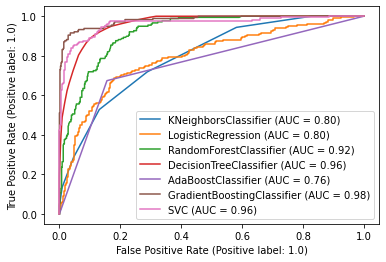

In [128]:
# Graph of AUC for Train Data of each model
disp=plot_roc_curve(knn,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dec_tree,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ada,x_train,y_train,ax=disp.ax_)
plot_roc_curve(Grdnt,x_train,y_train,ax=disp.ax_)
plot_roc_curve(Svm,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

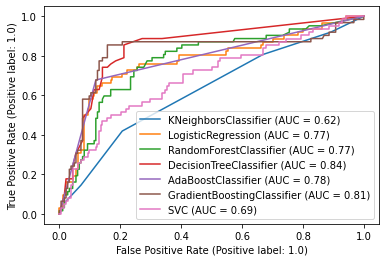

In [129]:
# Graph of AUC for Test Data of each model
disp=plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dec_tree,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Grdnt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(Svm,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [130]:
import pickle


In [131]:
pickle.dump('lr',open('LogisticRegresion_model','wb')) # save the best model

### LogisticRegresion_model is good for this dataset. Train & Test AUC line is almost same. Test accuracy score is very close to trainig score.Got the Test result as close to Training. So we can take LogisticRegresion_model for go ahead